In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
energy = 0.9
pressure= .004
radius = 2
tempSpike = 8

In [12]:
# log surface tension for whole simulation... don't necessarily grab a file write 
# call it in one line on jupyter
 # python ___.exe parameter enter... make a file
# have all things to create a log file
# has a function that launches simulation 

# usually you make a package that imports functions
# that other people could use

filename = "longerRun" + str(tempSpike) + "energy" + str(energy) + "r" + str(radius) + ".h5"
hdf5_file = h5py.File(filename, 'r') 

In [11]:
with h5py.File("longerRun"+str(tempSpike)+"energy"+str(energy)+"r"+str(radius)+".h5", 'r') as hdf5_file:
    for key in hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities'].keys():
        print(key)

degrees_of_freedom
kinetic_energy
kinetic_temperature
num_particles
potential_energy
pressure
pressure_tensor
rotational_degrees_of_freedom
rotational_kinetic_energy
translational_degrees_of_freedom
translational_kinetic_energy
volume


In [15]:
pressure_tens = np.float64(hdf5_file['hoomd-data/md/compute/ThermodynamicQuantities/pressure_tensor'][:])

In [23]:
pressure_tens.shape

(100, 6)

In [24]:
P_xx = pressure_tens[:, 0]  # pressure in x-direction
P_yy = pressure_tens[:, 4]  # pressure in y-direction

In [25]:
surface_tension = (P_yy - P_xx) / 2

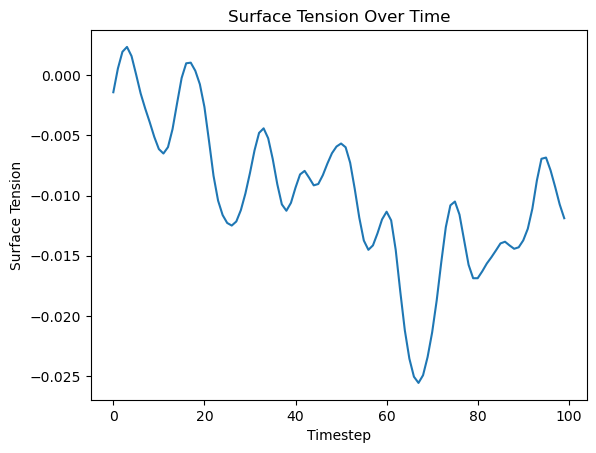

In [26]:
timesteps = np.arange(len(surface_tension)) 
plt.plot(timesteps, surface_tension)
plt.xlabel('Timestep')
plt.ylabel('Surface Tension')
plt.title('Surface Tension Over Time')
plt.show()

In [21]:
np.savetxt("surface_tension_data"+"energy"+str(energy)+str(tempSpike)+"r"+str(radius)+".txt", np.column_stack((timesteps, surface_tension)), 
           header="Timestep Surface_Tension", fmt="%d %.6f")
